# Study of $K^{+}$ particles distribution from FLUKA simulation 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import scipy.optimize as opt
from scipy.stats import norm

### Open and organize the file 

In [2]:
f = open('input_kplus_999.dat', 'r')

In [3]:
##This cell organizes the file's columns into different numpy arrays

primprot, partid, x,y,z,px,py,pz,dummy1,dummy2,dummy3 = np.genfromtxt('input_kplus_999.dat', unpack=True)
#print(primprot)
#print(partid)
#print(x)
#print(y)
#print(z)
#print(px)
#print(py)
#print(pz)
#print(dummy1)
#print(dummy2)
#print(dummy3)

### Total Energy Distribution for every particle defined as:  $\sqrt{m_{K}^{2} + \sqrt{p_{x}^{2} + p_{y}^{2} + p_{z}^{2}}}$ 

In [4]:
n = x.shape
print(n)

mK = 0.493
E_tot = np.array([])
for i in range(n[0]):
    px1 = px[i]
    py1 = py[i]
    pz1 = pz[i]
    E_tot = np.append(E_tot,[np.sqrt(np.power(mK,2) + np.sqrt(np.power(px1,2) + np.power(py1,2) + np.power(pz1,2)))]) 
    

(14900,)


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 0, 'E_tot')

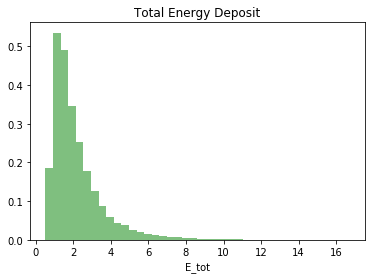

In [5]:
hE_tot = plt.hist(E_tot,40, normed=True,facecolor='green', alpha=0.5)
plt.title("Total Energy Deposit")
plt.xlabel("E_tot")

### Azimuthal angle ($\phi$) distribution from $\arctan{\frac{p_{x}}{p_{z}}}$ 

Text(0.5, 1.0, '$\\Phi$ Distribution')

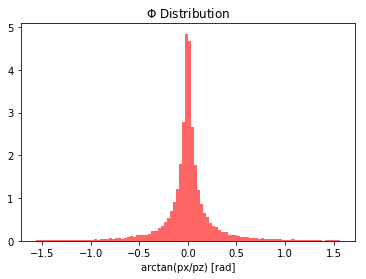

In [6]:
#phi_p --> azimuthal_p
hrad_xz =plt.hist(np.arctan(px/pz) ,100, normed=True,facecolor='red', alpha=0.6)
#plt.axis([-10, 0.1, 0, 50])
plt.xlabel("arctan(px/pz) [rad]")
plt.title("$\Phi$ Distribution")

## $\theta$ angle distribution from $\arctan{\frac{p_{y}}{p_{z}}}$

Text(0.5, 1.0, '$\theta$ Distribution')

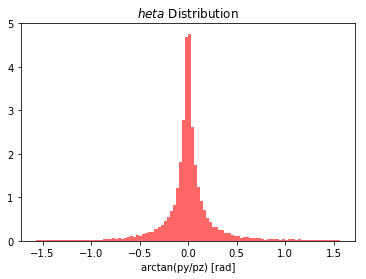

In [7]:
#theta_p
hrad_pypz = plt.hist(np.arctan(py/pz) ,100, normed=True,facecolor='red', alpha=0.6)
#plt.axis([-0.1, 0.1, 0, 50])
plt.xlabel("arctan(py/pz) [rad]")
plt.title("$\theta$ Distribution")

# Momentum Distribution at 0-50/50-100/100-150/150-200 mrad for the Azimuthal angle $\phi$

Number of K+ particles at $\phi$ = 0-50: (3075,)
Number of K+ particles at $\phi$ = 50-100: (1374,)
Number of K+ particles at $\phi$ = 100-150: (759,)
Number of K+ particles at $\phi$ = 150-200: (501,)


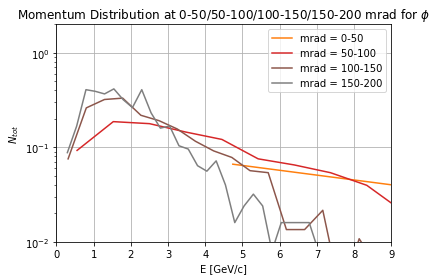

In [12]:
hE = []
E = []
x = []
y = []
nbin = []
bincenters = []
a = 0.
b = 0.2
Num = 4
dim = (b - a)/Num
for i in range(Num): 
    E.append(np.array([]))
    hE.append(np.array([]))
    x.append(np.array([]))
    y.append(np.array([]))
    nbin.append(np.array([]))
    bincenters.append(np.array([]))
    
for i in range(n[0]): 
    px1 = px[i]
    py1 = py[i]
    pz1 = pz[i]
    if (np.arctan(px1/pz1) >= 0) and (np.arctan(px1/pz1) <= 0.2): 
        ele = int((np.arctan(px1/pz1) - a)//dim)
        E[ele] = np.append(E[ele],[np.sqrt(np.power(px1,2) + np.power(py1,2) + np.power(pz1,2))])
for l in range(Num): 
    y[l], x[l], nbin[l] = plt.hist(E[l],30, normed=True,facecolor='green', alpha=0)   
    bincenters[l] = 0.5*(x[l][1:]+x[l][:-1])

    plt.yscale('log')
    plt.grid(True)
    hE[l] = plt.plot(bincenters[l],y[l], label='mrad = ' + str(l*50) + '-' + str((l+1)*50))
    plt.xlabel("E [GeV/c]")
    plt.ylabel("$N_{tot}$")
    plt.axis([0, 9, 0.01, 2])
    plt.title("Momentum Distribution at 0-50/50-100/100-150/150-200 mrad for $\phi$")
    plt.legend()
    print('Number of K+ particles at $\phi$ = ' + str(l*50) + '-' + str((l+1)*50) + ': ' + str(E[l].shape))

#plt.savefig('Energy_distribution.png',bbox_inches='tight')
    

# Momentum Distribution at 0-50/50-100/100-150/150-200 mrad for the polar angle $\theta$ 

Number of K+ particles at theta = 0-50: (3011,)
Number of K+ particles at theta = 50-100: (1364,)
Number of K+ particles at theta = 100-150: (784,)
Number of K+ particles at theta = 150-200: (519,)


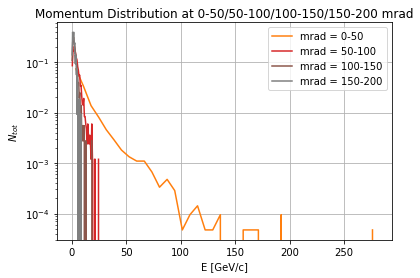

In [14]:
hE = []
E = []
x = []
y = []
nbin = []
bincenters = []
a = 0.
b = 0.2
Num = 4
dim = (b - a)/Num
for i in range(Num): 
    E.append(np.array([]))
    hE.append(np.array([]))
    x.append(np.array([]))
    y.append(np.array([]))
    nbin.append(np.array([]))
    bincenters.append(np.array([]))
    
for i in range(n[0]): 
    px1 = px[i]
    py1 = py[i]
    pz1 = pz[i]
    if (np.arctan(py1/pz1) > 0) and (np.arctan(py1/pz1) < 0.2): 
        ele = int((np.arctan(py1/pz1) - a)//dim)
        E[ele] = np.append(E[ele],[np.sqrt(np.power(px1,2) + np.power(py1,2) + np.power(pz1,2))])
for l in range(Num): 
    y[l], x[l], nbin[l] = plt.hist(E[l],40, normed=True,facecolor='green', alpha=0)   
    bincenters[l] = 0.5*(x[l][1:]+x[l][:-1])

    plt.yscale('log')
    plt.grid(True)
    hE[l] = plt.plot(bincenters[l],y[l], label='mrad = ' + str(l*50) + '-' + str((l+1)*50))
    plt.xlabel("E [GeV/c]")
    plt.ylabel("$N_{tot}$")
    plt.title("Momentum Distribution at 0-50/50-100/100-150/150-200 mrad")
    plt.legend()
    print('Number of K+ particles at theta = ' + str(l*50) + '-' + str((l+1)*50) + ': ' + str(E[l].shape))
    

#plt.savefig('Energy_distribution.png',bbox_inches='tight')
    

# Momentum Distribution at 0-100/100-200 mrad for the polar angle $\phi$ 

Number of particles at theta = 0-100: (4449,)
Number of particles at theta = 100-200: (1260,)


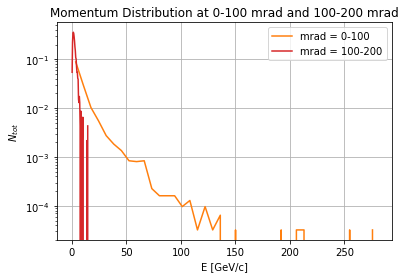

In [15]:
hE = []
E = []
x = []
y = []
nbin = []
bincenters = []
a = 0.
b = 0.2
Num = 2
dim = (b - a)/Num
for i in range(Num): 
    E.append(np.array([]))
    hE.append(np.array([]))
    x.append(np.array([]))
    y.append(np.array([]))
    nbin.append(np.array([]))
    bincenters.append(np.array([]))
    
for i in range(n[0]): 
    px1 = px[i]
    py1 = py[i]
    pz1 = pz[i]
    if (np.arctan(px1/pz1) > 0) and (np.arctan(px1/pz1) < 0.2): 
        ele = int((np.arctan(px1/pz1) - a)//dim)
        E[ele] = np.append(E[ele],[np.sqrt(np.power(px1,2) + np.power(py1,2) + np.power(pz1,2))])
for l in range(Num): 
    y[l], x[l], nbin[l] = plt.hist(E[l],40, normed=True,facecolor='green', alpha=0)   
    bincenters[l] = 0.5*(x[l][1:]+x[l][:-1])

    plt.yscale('log')
    plt.grid(True)
    hE[l] = plt.plot(bincenters[l],y[l], label='mrad = ' + str(l*100) + '-' + str((l+1)*100))
    plt.xlabel("E [GeV/c]")
    plt.ylabel("$N_{tot}$")
    plt.title("Momentum Distribution at 0-100 mrad and 100-200 mrad")
    plt.legend()
    print('Number of particles at theta = ' + str(l*100) + '-' + str((l+1)*100) + ': ' + str(E[l].shape))
    

#plt.savefig('Energy_distribution.png',bbox_inches='tight')

# Momentum Distribution at 0-100/100-200 mrad for the polar angle $\theta$ 

Number of particles at theta = 0-100: (4375,)
Number of particles at theta = 100-200: (1303,)


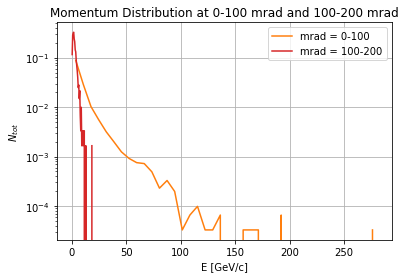

In [16]:
hE = []
E = []
x = []
y = []
nbin = []
bincenters = []
a = 0.
b = 0.2
Num = 2
dim = (b - a)/Num
for i in range(Num): 
    E.append(np.array([]))
    hE.append(np.array([]))
    x.append(np.array([]))
    y.append(np.array([]))
    nbin.append(np.array([]))
    bincenters.append(np.array([]))
    
for i in range(n[0]): 
    px1 = px[i]
    py1 = py[i]
    pz1 = pz[i]
    if (np.arctan(py1/pz1) >= 0) and (np.arctan(py1/pz1) <= 0.2): 
        ele = int((np.arctan(py1/pz1) - a)//dim)
        E[ele] = np.append(E[ele],[np.sqrt(np.power(px1,2) + np.power(py1,2) + np.power(pz1,2))])
for l in range(Num): 
    y[l], x[l], nbin[l] = plt.hist(E[l],40, normed=True,facecolor='green', alpha=0)   
    bincenters[l] = 0.5*(x[l][1:]+x[l][:-1])

    plt.yscale('log')
    plt.grid(True)
    hE[l] = plt.plot(bincenters[l],y[l], label='mrad = ' + str(l*100) + '-' + str((l+1)*100))
    plt.xlabel("E [GeV/c]")
    plt.ylabel("$N_{tot}$")
    plt.title("Momentum Distribution at 0-100 mrad and 100-200 mrad")
    plt.legend()
    print('Number of particles at theta = ' + str(l*100) + '-' + str((l+1)*100) + ': ' + str(E[l].shape))
    

#plt.savefig('Energy_distribution.png',bbox_inches='tight')

# Momentum Distribution at $\pm$0-100/$\pm$100-200 mrad for the azimuthal angle $\phi$ 

Number of particles at phi = +/- 0-100: (8893,)
Number of particles at phi = +/- 100-200: (2536,)


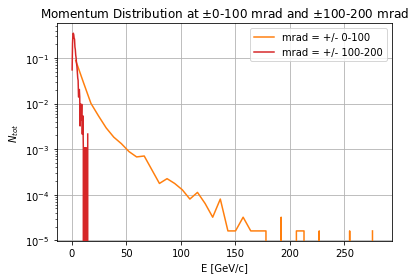

In [18]:
hE = []
E = []
x = []
y = []
nbin = []
bincenters = []
a = 0.
b = 0.2
Num = 2
dim = (b - a)/Num
for i in range(Num): 
    E.append(np.array([]))
    hE.append(np.array([]))
    x.append(np.array([]))
    y.append(np.array([]))
    nbin.append(np.array([]))
    bincenters.append(np.array([]))
    
for i in range(n[0]): 
    px1 = px[i]
    py1 = py[i]
    pz1 = pz[i]
    if (np.arctan(px1/pz1) <= 0.2) and (np.arctan(px1/pz1) >= - 0.2): 
        ele = int((np.absolute(np.arctan(px1/pz1)) - a)//dim)
        E[ele] = np.append(E[ele],[np.sqrt(np.power(px1,2) + np.power(py1,2) + np.power(pz1,2))])
for l in range(Num): 
    y[l], x[l], nbin[l] = plt.hist(E[l],40, normed=True,facecolor='green', alpha=0)   
    bincenters[l] = 0.5*(x[l][1:]+x[l][:-1])

    plt.yscale('log')
    plt.grid(True)
    hE[l] = plt.plot(bincenters[l],y[l], label='mrad = +/- ' + str(l*100) + '-' + str((l+1)*100))
    plt.xlabel("E [GeV/c]")
    plt.ylabel("$N_{tot}$")
    plt.title("Momentum Distribution at $\pm$0-100 mrad and $\pm$100-200 mrad")
    plt.legend()
    print('Number of particles at phi = +/- ' + str(l*100) + '-' + str((l+1)*100) + ': ' + str(E[l].shape))
    

#plt.savefig('Energy_distribution.png',bbox_inches='tight')

# Momentum Distribution at $\pm$0-100/$\pm$100-200 mrad for the polar angle $\theta$ 

Number of particles at theta = +/- 0-100: (8846,)
Number of particles at theta = +/- 100-200: (2584,)


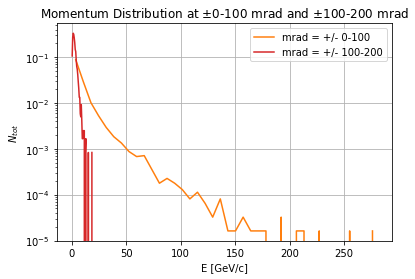

In [19]:
hE = []
E = []
x = []
y = []
nbin = []
bincenters = []
a = 0.
b = 0.2
Num = 2
dim = (b - a)/Num
for i in range(Num): 
    E.append(np.array([]))
    hE.append(np.array([]))
    x.append(np.array([]))
    y.append(np.array([]))
    nbin.append(np.array([]))
    bincenters.append(np.array([]))
    
for i in range(n[0]): 
    px1 = px[i]
    py1 = py[i]
    pz1 = pz[i]
    if (np.arctan(py1/pz1) <= 0.2) and (np.arctan(py1/pz1) >= - 0.2): 
        ele = int((np.absolute(np.arctan(py1/pz1)) - a)//dim)
        E[ele] = np.append(E[ele],[np.sqrt(np.power(px1,2) + np.power(py1,2) + np.power(pz1,2))])
for l in range(Num): 
    y[l], x[l], nbin[l] = plt.hist(E[l],40, normed=True,facecolor='green', alpha=0)   
    bincenters[l] = 0.5*(x[l][1:]+x[l][:-1])

    plt.yscale('log')
    plt.grid(True)
    hE[l] = plt.plot(bincenters[l],y[l], label='mrad = +/- ' + str(l*100) + '-' + str((l+1)*100))
    plt.xlabel("E [GeV/c]")
    plt.ylabel("$N_{tot}$")
    plt.title("Momentum Distribution at $\pm$0-100 mrad and $\pm$100-200 mrad")
    plt.legend()
    print('Number of particles at theta = +/- ' + str(l*100) + '-' + str((l+1)*100) + ': ' + str(E[l].shape))
    

#plt.savefig('Energy_distribution.png',bbox_inches='tight')

# Momentum Distribution at $\pm$0-100/$\pm$0-200 mrad for the azimuthal angle $\phi$ 

z:  0
MPV:  0.06657892065797477
Mean Value:  9.90892108843429
Y Max:  0.07696457042950557
K^{+} N_{tot}:  (8893,)
z:  1
MPV:  0.06657892065797477
Mean Value:  8.250885879080837
Y Max:  0.08357648770040102
K^{+} N_{tot}:  (11429,)


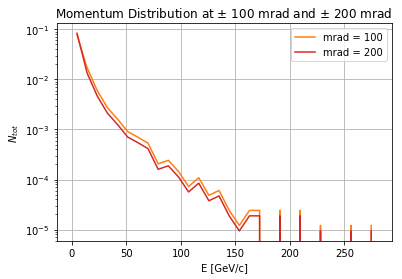

In [21]:
hE = []
E_tot = []
y_tot = []
for z in range (2):    
    E = np.array([])
    for i in range(n[0]): 
        px1 = px[i]
        py1 = py[i]
        pz1 = pz[i]
    
        if (np.arctan(px1/pz1) > - (z + 1)*0.1) and np.arctan(px1/pz1) < (z + 1)*0.1: 
            E = np.append(E,[np.sqrt(np.power(px1,2) + np.power(py1,2) + np.power(pz1,2))])
       
    y, x, nbin = plt.hist(E,30, normed=True,facecolor='green', alpha=0)    
    bincenters = 0.5*(x[1:]+x[:-1])
    

  #  hE = plt.plot(bincenters,y)
    
    print("z: ", z)
    print("MPV: ", x[np.argmax(y)])
    print("Mean Value: ", np.mean(E))
    print("Y Max: ", y.max())
    print("K^{+} N_{tot}: ", E.shape)
    plt.yscale('log')
    hE = plt.plot(bincenters,y, label="mrad = %d"%((z + 1)*100,))
   # plt.show()
    plt.xlabel("E [GeV/c]")
    plt.ylabel("$N_{tot}$")
    plt.grid(True)
    plt.title("Momentum Distribution at $\pm$ 100 mrad and $\pm$ 200 mrad")
    plt.legend()
    #format_list = [(z + 1)*100, E.shape]
    #plt.axis([0.5, 9, 0.001, 1])
  #  plt.text(2,0.65,"Number of K at {} mrad: {} ".format(*format_list))


# Momentum Distribution at $\pm$0-100/$\pm$0-200 mrad for the polar angle $\theta$ 

z:  0
MPV:  0.06657892065797477
Mean Value:  9.90892108843429
Y Max:  0.07696457042950557
K^{+} N_{tot}:  (8893,)
z:  1
MPV:  0.06657892065797477
Mean Value:  8.250885879080837
Y Max:  0.08357648770040102
K^{+} N_{tot}:  (11429,)


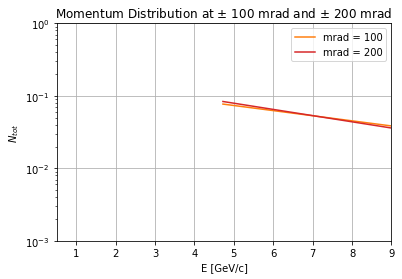

In [22]:
hE = []
E_tot = []
y_tot = []
for z in range (2):    
    E = np.array([])
    for i in range(n[0]): 
        px1 = px[i]
        py1 = py[i]
        pz1 = pz[i]
    
        if (np.arctan(px1/pz1) > - (z + 1)*0.1) and (np.arctan(px1/pz1) < (z + 1)*0.1): 
            E = np.append(E,[np.sqrt(np.power(px1,2) + np.power(py1,2) + np.power(pz1,2))])
       
    y, x, nbin = plt.hist(E,30, normed=True,facecolor='green', alpha=0)    
    bincenters = 0.5*(x[1:]+x[:-1])
    

  #  hE = plt.plot(bincenters,y)
    
    print("z: ", z)
    print("MPV: ", x[np.argmax(y)])
    print("Mean Value: ", np.mean(E))
    print("Y Max: ", y.max())
    print("K^{+} N_{tot}: ", E.shape)
    plt.yscale('log')
    hE = plt.plot(bincenters,y, label="mrad = %d"%((z + 1)*100,))
   # plt.show()
    plt.xlabel("E [GeV/c]")
    plt.ylabel("$N_{tot}$")
    plt.grid(True)
    plt.title("Momentum Distribution at $\pm$ 100 mrad and $\pm$ 200 mrad")
    plt.legend()
    #format_list = [(z + 1)*100, E.shape]
    plt.axis([0.5, 9, 0.001, 1])
  #  plt.text(2,0.65,"Number of K at {} mrad: {} ".format(*format_list))
